In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

(1, 3, 3, 1)


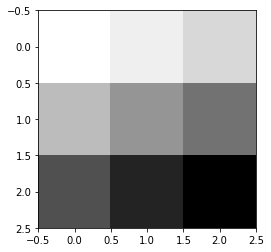

In [6]:
image = np.array( [ [
    [ [ 1 ], [ 2 ], [ 3 ] ],
    [ [ 4 ], [ 5 ], [ 6 ] ],
    [ [ 7 ], [ 8 ], [ 9 ] ]
] ], dtype = np.float32 )
print( image.shape )
plt.imshow( image.reshape( 3, 3 ), cmap = 'Greys' )

# 1 filter ( 2, 2, 1, 1 ) with padding: VALID

image.shape  (1, 3, 3, 1)
weight.shape  (2, 2, 1, 1)
conv2d.shape  (1, 2, 2, 1)
[[12. 16.]
 [24. 28.]]


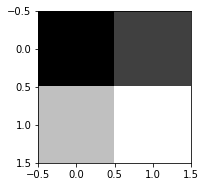

In [24]:
print( 'image.shape ', image.shape )

weight = tf.constant( [ [ [ [ 1. ] ], [ [ 1. ] ] ],
                       [ [ [ 1. ] ], [ [ 1. ] ] ] ] )
print( 'weight.shape ', weight.shape )

conv2d = tf.nn.conv2d( image, weight, strides = [ 1, 1, 1, 1 ],
                     padding = 'VALID' )
print( 'conv2d.shape ', conv2d.shape )

conv2d_img = np.swapaxes( conv2d, 0, 3 )
for i, one_img in enumerate( conv2d_img ):
    print( one_img.reshape( 2, 2 ) )
    
    plt.subplot( 1, 2, i + 1 )
    plt.imshow( one_img.reshape( 2, 2 ), cmap = 'gray' )

# 1 filter ( 2, 2, 1, 1) with padding: SAME

image.shape  (1, 3, 3, 1)
weight.shape  (2, 2, 1, 1)
conv2d.shape  (1, 3, 3, 1)
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]


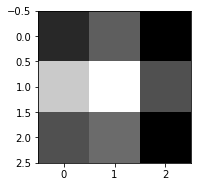

In [25]:
print( 'image.shape ', image.shape )

weight = tf.constant( [ [ [ [ 1. ] ], [ [ 1. ] ] ],
                       [ [ [ 1. ] ], [ [ 1. ] ] ] ] )
print( 'weight.shape ', weight.shape )

conv2d = tf.nn.conv2d( image, weight, strides = [ 1, 1, 1, 1 ],
                     padding = 'SAME' )
print( 'conv2d.shape ', conv2d.shape )

conv2d_img = np.swapaxes( conv2d, 0, 3 )
for i, one_img in enumerate( conv2d_img ):
    print( one_img.reshape( 3, 3 ) )
    
    plt.subplot( 1, 2, i + 1 )
    plt.imshow( one_img.reshape( 3, 3 ), cmap = 'gray' )

# 3 filters ( 2, 2, 1, 3 )

image.shape:  (1, 3, 3, 1)
weight.shape:  (2, 2, 1, 3)
conv2d.shape:  (1, 3, 3, 3)
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]
[[120. 160.  90.]
 [240. 280. 150.]
 [150. 170.  90.]]
[[-12. -16.  -9.]
 [-24. -28. -15.]
 [-15. -17.  -9.]]


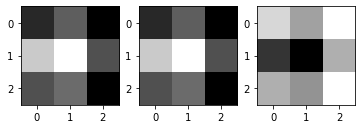

In [27]:
print( 'image.shape: ', image.shape )

weight = tf.constant( [ [ [ [ 1., 10., -1. ] ], [ [ 1., 10., -1. ] ] ],
                      [ [ [ 1., 10., -1. ] ], [ [ 1., 10., -1. ] ] ] ] )
print( 'weight.shape: ', weight.shape )

conv2d = tf.nn.conv2d( image, weight, strides = [ 1, 1, 1, 1 ],
                      padding = 'SAME' )
print( 'conv2d.shape: ', conv2d.shape )

conv2d_img = np.swapaxes( conv2d, 0, 3 )
for i, one_img in enumerate( conv2d_img ):
    print( one_img.reshape( 3, 3 ) )
    plt.subplot( 1, 3, i + 1 )
    plt.imshow( one_img.reshape( 3, 3 ), cmap = 'gray' )

# MAX POOLING

In [32]:
image = np.array( [ [ [ [ 4 ], [ 3 ] ],
                  [ [ 2 ], [ 1 ] ] ] ], dtype = np.float32 )
pool = tf.nn.max_pool( image, ksize = [ 1, 2, 2, 1 ],
                     strides = [ 1, 1, 1, 1 ], padding = 'VALID' )

print( pool.shape )
tf.print( pool )

(1, 1, 1, 1)
[[[[4]]]]


# SAME: Zero paddings

In [33]:
image = np.array( [ [ [ [ 4 ], [ 3 ] ],
                  [ [ 2 ], [ 1 ] ] ] ], dtype = np.float32 )
pool = tf.nn.max_pool( image, ksize = [ 1, 2, 2, 1 ],
                     strides = [ 1, 1, 1, 1 ], padding = 'SAME' )

print( pool.shape )
tf.print( pool )

(1, 2, 2, 1)
[[[[4]
   [3]]

  [[2]
   [1]]]]


In [3]:
mnist = tf.keras.datasets.mnist
( x_train, y_train ), ( x_test, y_test ) = mnist.load_data()

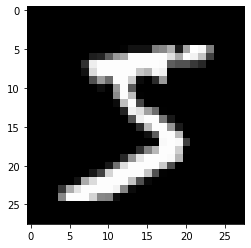

In [5]:
img = x_train[0]
plt.imshow( img, cmap = 'gray' )

In [6]:
img = img.reshape( -1, 28, 28, 1 )
W1 = tf.Variable( tf.random.normal( [ 3, 3, 1, 5 ], stddev = 0.01 ) )
conv2d = tf.nn.conv2d( img, W1, strides = [ 1, 2, 2, 1 ], padding = 'SAME' )
print( conv2d )

tf.Tensor(
[[[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
     0.00000000e+00]
   [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
     0.00000000e+00]
   [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
     0.00000000e+00]
   [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
     0.00000000e+00]
   [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
     0.00000000e+00]
   [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
     0.00000000e+00]
   [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
     0.00000000e+00]
   [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
     0.00000000e+00]
   [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
     0.00000000e+00]
   [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
     0.00000000e+00]
   [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
     0.00000000e+00]
   [ 0.000

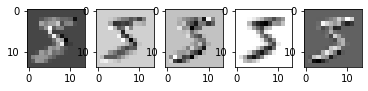

In [8]:
conv2d_img = np.swapaxes( conv2d, 0, 3 )
for i, one_img in enumerate( conv2d_img ):
    plt.subplot( 1, 5, i + 1 )
    plt.imshow( one_img.reshape( 14, 14 ), cmap = 'gray' )

[[[[0 0 0 0 0]
   [0 0 0 0 0]
   [0 0 0 0 0]
   ...
   [0 0 0 0 0]
   [0 0 0 0 0]
   [0 0 0 0 0]]

  [[0 0 0 0 0]
   [2.97036695 0 0 0 0.566867173]
   [2.81307673 -1.31358504 0.0328823291 -0.875935316 9.59297848]
   ...
   [1.88322639 -1.2048254 -0.966840744 -4.36626148 7.03715277]
   [2.03819466 -1.56076539 1.12230086 -2.59537506 10.2920074]
   [0 0 0 0 0]]

  [[0 0 0 0 0]
   [0.911515117 2.62837839 0.781422734 0 1.06325161]
   [5.90901518 0.0455241539 0.112566605 -0.0771487 0.488524705]
   ...
   [1.86258411 0 0 0 0]
   [0 0 0 0 0]
   [0 0 0 0 0]]

  ...

  [[0 0 0 0 0]
   [0 0 0 0 0]
   [2.84241605 0 0 0 0]
   ...
   [5.31031704 -5.46915913 -0.0754548386 -5.48891068 5.71657467]
   [0.00143664773 0 0 0 0.499136746]
   [0 0 0 0 0]]

  [[1.94152689 0 0 0 0]
   [2.69545317 -0.193322614 1.41060054 -0.11600399 7.83921051]
   [3.02921295 -5.44620228 -0.603967786 -5.20648575 8.78727722]
   ...
   [1.13621461 0 0 0 0]
   [0 0 0 0 0]
   [0 0 0 0 0]]

  [[0.668023407 1.62094891 0.423298299 0 0

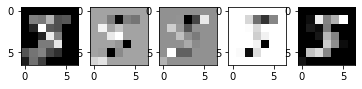

In [10]:
pool = tf.nn.max_pool( conv2d, ksize = [ 1, 2, 2, 1 ],
                      strides = [ 1, 2, 2, 1 ], padding = 'SAME' )
tf.print( pool )
pool_img = np.swapaxes( pool, 0, 3 )
for i, one_img in enumerate( pool_img ):
    plt.subplot( 1, 5, i + 1 )
    plt.imshow( one_img.reshape( 7, 7 ), cmap = 'gray' )